In [315]:
import cPickle
import os
import gzip
import numpy as np

In [316]:
%time train, cv, test, dicts = cPickle.load(gzip.open('data/atis.fold3.pkl.gz','rb'))
item_list = []
for key in dicts.keys():
    item_list += [(k,v) for v,k in dicts[key].items()]
idw = dict(item_list)
idw

CPU times: user 1.36 s, sys: 15.2 ms, total: 1.38 s
Wall time: 1.36 s


{0: "'d",
 1: "'ll",
 2: "'m",
 3: "'re",
 4: "'s",
 5: "'t",
 6: '72s',
 7: '<UNK>',
 8: 'DIGIT',
 9: 'DIGITDIGIT',
 10: 'DIGITDIGITDIGIT',
 11: 'DIGITDIGITDIGITDIGIT',
 12: 'DIGITDIGITDIGITDIGITDIGITDIGIT',
 13: 'a',
 14: 'abbreviation',
 15: 'abbreviations',
 16: 'about',
 17: 'ac',
 18: 'actually',
 19: 'after',
 20: 'afternoon',
 21: 'again',
 22: 'air',
 23: 'aircraft',
 24: 'airfare',
 25: 'airline',
 26: 'airlines',
 27: 'airplane',
 28: 'airplanes',
 29: 'airport',
 30: 'airports',
 31: 'alaska',
 32: 'all',
 33: 'along',
 34: 'also',
 35: 'am',
 36: 'america',
 37: 'american',
 38: 'amount',
 39: 'an',
 40: 'and',
 41: 'angeles',
 42: 'another',
 43: 'any',
 44: 'anywhere',
 45: 'ap',
 46: 'ap57',
 47: 'ap80',
 48: 'approximately',
 49: 'april',
 50: 'are',
 51: 'area',
 52: 'arizona',
 53: 'around',
 54: 'arrange',
 55: 'arrangements',
 56: 'arrival',
 57: 'arrivals',
 58: 'arrive',
 59: 'arrives',
 60: 'arriving',
 61: 'as',
 62: 'at',
 63: 'atl',
 64: 'atlanta',
 65: 'augu

In [317]:
%time print [idw[x] for x in train[0][2]]
%time print [idw[x] for x in train[1][2]]
%time print [idw[x] for x in train[2][2]]

['i', 'need', 'a', 'flight', 'from', 'atlanta', 'to', 'philadelphia', 'and', 'i', "'m", 'looking', 'for', 'the', 'cheapest', 'fare']
CPU times: user 740 µs, sys: 542 µs, total: 1.28 ms
Wall time: 832 µs
["'d", "'d", "'d", "'d", "'d", 'actually', "'d", 'actually', "'d", "'d", "'d", "'d", "'d", "'d", 'airplane', "'d"]
CPU times: user 579 µs, sys: 232 µs, total: 811 µs
Wall time: 628 µs
['d', 'd', 'd', 'd', 'd', 'approximately', 'd', 'both', 'd', 'd', 'd', 'd', 'd', 'd', 'again', 'd']
CPU times: user 251 µs, sys: 109 µs, total: 360 µs
Wall time: 302 µs


In [318]:
def contextwin(l, win):
    '''
    the window must be a odd number
    '''
    assert (win % 2) == 1
    assert win >= 1
    l = list(l)

    lpadded = win // 2 * [-1] + l + win // 2 * [-1]
    out = [lpadded[i:(i + win)] for i in range(len(l))]

    assert len(out) == len(l)
    return out
contextwin(train[1][2], 5)

[[-1, -1, 0, 0, 0],
 [-1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 18],
 [0, 0, 0, 18, 0],
 [0, 0, 18, 0, 18],
 [0, 18, 0, 18, 0],
 [18, 0, 18, 0, 0],
 [0, 18, 0, 0, 0],
 [18, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 27],
 [0, 0, 0, 27, 0],
 [0, 0, 27, 0, -1],
 [0, 27, 0, -1, -1]]

In [319]:
label_1 = np.concatenate(train[1])
for k in set(label_1):
    print k, list(label_1).count(k)

0 28890
1 10
2 172
4 24
5 101
6 564
7 54
8 134
9 8
10 2
11 49
12 1
13 3
15 139
16 1
17 10
18 7303
19 176
20 3
21 1
22 1
23 2
24 11
25 2
26 1
27 238
28 3
29 7
30 767
31 294
32 3
33 18
35 1
36 45
37 1
38 34
39 41
40 60
41 67
43 31
44 188
45 132
46 23
47 2
48 2
49 1
50 1
51 1
52 127
53 1
54 25
55 2
56 8
57 4
58 2
59 32
60 1
61 31
62 4
63 47
64 7
65 341
66 1
67 3
68 1
69 67
72 6
73 52
74 1
75 1
76 536
77 18
78 6
79 278
80 3
81 12
82 18
83 1
84 1
85 9
86 122
87 99
88 3
89 1
90 3
92 4
93 1
94 453
95 2
96 11
97 71
98 1
99 44
100 2
101 8
102 1
103 6
104 2
105 1
106 20
107 339
108 181
109 1516
110 148
111 45
112 100
113 10
114 41
115 2
116 10
117 17
118 28
120 3
121 1
122 7
123 10
124 278
125 20
126 397
127 4
128 19
129 19
131 1
132 1
133 12
135 1
136 3
137 5
138 3
139 11
140 21


In [320]:
label_2 = np.concatenate(train[2])
for k in set(label_2):
    print k, list(label_2).count(k)
print len(set(label_2))

0 25
1 104
2 564
3 24
4 32
5 7
6 68
7 35
8 35
9 2
10 15
11 3
12 46
13 16
14 161
15 146
17 191
18 179
20 34
21 275
22 4
23 2
24 3
25 67
26 694
27 311
28 301
29 67
30 20
31 15
32 37
33 488
34 15
35 280
36 245
37 34
38 43
39 61
41 31
42 274
43 65
44 139
45 62
46 11
47 70
48 3458
49 40
50 35
51 38
52 4
53 47
54 24
55 2
56 52
57 4
58 18
59 10
60 1
61 3
62 3
63 1
64 2
65 3
66 284
67 8
68 2
70 1
71 189
72 4
73 2
74 1
75 2
76 19
77 31
78 3458
79 3
80 70
81 69
82 44
83 339
84 44
85 4
86 14
87 3
88 5
89 122
90 2
91 39
92 148
93 45
94 95
95 12
96 10
97 4
98 8
99 237
100 2
101 10
102 41
103 2
104 10
106 17
107 28
108 100
109 549
110 9
111 3
112 1
113 10
114 2
115 1
116 2
117 278
119 40
120 1
121 3
122 37
123 888
124 11
125 19
126 28948
121


In [321]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils, plot_model
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers.embeddings import Embedding

##### We will use label 1 to train

In [322]:
x_train = np.concatenate([contextwin(vec, 5) for vec in train[0]])
x_test = np.concatenate([contextwin(vec, 5) for vec in test[0]])
print np.shape(x_train), np.shape(x_test)

(45376, 5) (9198, 5)


In [323]:
y_train = np_utils.to_categorical(np.concatenate(train[1]),141)
y_test = np_utils.to_categorical(np.concatenate(test[1]),141)
print np.shape(y_train), np.shape(y_test)
n_cls = len(y_train[0])
print n_cls

(45376, 141) (9198, 141)
141


In [324]:
def comp_cls_wts(y):
    cls = dict((k,1.*len(y)/n_cls/np.sqrt(list(y).count(k))) for k in set(y))
    return cls
cls_weights = comp_cls_wts(np.concatenate(train[1]))
print cls_weights

{0: 1.893360557236158, 1: 101.76702915446835, 2: 24.538209671674714, 4: 65.690334851376761, 5: 32.02184932125423, 6: 13.550881407912895, 7: 43.79355656758451, 8: 27.800633815021129, 9: 113.77899752879708, 10: 227.55799505759416, 11: 45.97365754812563, 12: 321.81560283687941, 13: 185.80032492729404, 15: 27.296043172452737, 16: 321.81560283687941, 17: 101.76702915446835, 18: 3.7657930205608117, 19: 24.257763779362769, 20: 185.80032492729404, 21: 321.81560283687941, 22: 321.81560283687941, 23: 227.55799505759416, 24: 97.031055117451075, 25: 227.55799505759416, 26: 321.81560283687941, 27: 20.860207205604972, 28: 185.80032492729404, 29: 121.6348647323879, 30: 11.620087933593197, 31: 18.768667100393358, 32: 185.80032492729404, 33: 75.852665019198056, 35: 321.81560283687941, 36: 47.9734376108891, 37: 321.81560283687941, 38: 55.190920563308367, 39: 50.259153329485024, 40: 41.546215677897806, 41: 39.316033383770957, 43: 57.799788544446365, 44: 23.470815085845615, 45: 28.010452895906894, 46: 67.

In [325]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(np.concatenate(train[1])), 
                                                 np.concatenate(train[1]))
print class_weight

[  1.19896739e-02   3.46381679e+01   2.01384697e+00   1.44325700e+01
   3.42952158e+00   6.14151914e-01   6.41447554e+00   2.58493791e+00
   4.32977099e+01   1.73190840e+02   7.06901387e+00   3.46381679e+02
   1.15460560e+02   2.49195453e+00   3.46381679e+02   3.46381679e+01
   4.74300533e-02   1.96807772e+00   1.15460560e+02   3.46381679e+02
   3.46381679e+02   1.73190840e+02   3.14892436e+01   1.73190840e+02
   3.46381679e+02   1.45538521e+00   1.15460560e+02   4.94830971e+01
   4.51605840e-01   1.17816898e+00   1.15460560e+02   1.92434266e+01
   3.46381679e+02   7.69737065e+00   3.46381679e+02   1.01876965e+01
   8.44833364e+00   5.77302799e+00   5.16987581e+00   1.11736026e+01
   1.84245574e+00   2.62410363e+00   1.50600730e+01   1.73190840e+02
   1.73190840e+02   3.46381679e+02   3.46381679e+02   3.46381679e+02
   2.72741480e+00   3.46381679e+02   1.38552672e+01   1.73190840e+02
   4.32977099e+01   8.65954198e+01   1.73190840e+02   1.08244275e+01
   3.46381679e+02   1.11736026e+01

### Setup model

In [326]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=1024, input_length=5))
model.add(SimpleRNN(256))
#model.add(LSTM(32))
model.add(Dense(n_cls))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 5, 1024)           1024000   
_________________________________________________________________
simple_rnn_27 (SimpleRNN)    (None, 256)               327936    
_________________________________________________________________
dense_22 (Dense)             (None, 141)               36237     
_________________________________________________________________
activation_30 (Activation)   (None, 141)               0         
Total params: 1,388,173.0
Trainable params: 1,388,173.0
Non-trainable params: 0.0
_________________________________________________________________


In [327]:
optimizer = SGD()
matrics = ['accuracy']
loss = 'categorical_crossentropy'
model.compile(loss=loss, metrics=matrics, optimizer=optimizer)

### Train the model

In [328]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), class_weight=cls_weights)

Train on 45376 samples, validate on 9198 samples
Epoch 1/10
45376/45376 [==============================] - 5s - loss: 15.7392 - acc: 0.8560 - val_loss: 0.4324 - val_acc: 0.9274
Epoch 2/10
45376/45376 [==============================] - 4s - loss: 5.4784 - acc: 0.9440 - val_loss: 0.2003 - val_acc: 0.9627
Epoch 3/10
45376/45376 [==============================] - 4s - loss: 2.4136 - acc: 0.9658 - val_loss: 0.3397 - val_acc: 0.9401
Epoch 4/10
45376/45376 [==============================] - 4s - loss: 1.1431 - acc: 0.9781 - val_loss: 0.1934 - val_acc: 0.9615
Epoch 5/10
45376/45376 [==============================] - 4s - loss: 0.8109 - acc: 0.9769 - val_loss: 0.1337 - val_acc: 0.9729
Epoch 6/10
45376/45376 [==============================] - 4s - loss: 0.4101 - acc: 0.9871 - val_loss: 0.1220 - val_acc: 0.9735
Epoch 7/10
45376/45376 [==============================] - 4s - loss: 0.2602 - acc: 0.9921 - val_loss: 0.0870 - val_acc: 0.9816
Epoch 8/10
45376/45376 [==============================] - 4s 

In [329]:
model.predict_classes(x_test)

8544/9198 [==========================>...] - ETA: 0s

array([  0,   0,   0, ...,  18,   0, 131])

In [330]:
np.concatenate(test[1])

array([ 0,  0,  0, ..., 18,  0, 18], dtype=int32)

In [331]:
loss, acc = model.evaluate(x_test, y_test, batch_size = 128)
print len(x_test),len(y_test)
print acc

7168/9198 [======================>.......] - ETA: 0s9198 9198
0.977495107036


In [332]:
x_cv = np.concatenate([contextwin(vec, 5) for vec in cv[0]])
y_cv = np_utils.to_categorical(np.concatenate(cv[1]),141)
loss, acc = model.evaluate(x_cv, y_cv, batch_size = 256)
print acc

 9216/11214 [=======================>......] - ETA: 0s0.989655789598


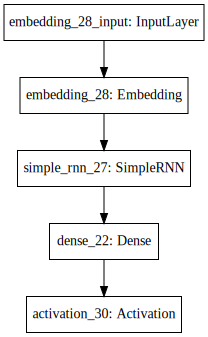

In [333]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))